Use this notebook to generate a plot of the performance of ML models and fine-tuned-CNN on a subset of miRBase. This subset contains the organisms with at least 200 entries in the miRBase dataset.

In [1]:
import pandas as pd

In [2]:
performance_filename = "species200_models_performance.csv"
performance_df = pd.read_csv(performance_filename)

In [3]:
performance_df

,Acronym,fine-tuned-CNN,AverageDT,ConsensusNB
0,mdm,1.000000,1.0000,0.9951
1,ssa,0.997305,0.9569,0.9515
2,cbn,0.985981,0.9346,0.9626
3,aca,0.982270,0.9787,0.9716
4,stu,0.982143,0.9464,0.9509
5,prd,0.980000,0.9600,0.9150
6,hsa,0.973418,0.9708,0.8612
7,mdo,0.971739,0.9348,0.9152
8,ipu,0.971530,0.9537,0.9217
9,aly,0.970732,1.0000,0.9951


In [4]:
sorted_performance_df = performance_df.sort_values(by=['fine-tuned-CNN'], ascending=False)

In [5]:
sorted_performance_df.to_csv("sorted_species200_performance.csv", index=False)

## Generate plot

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'font.weight': 'normal'})

In [8]:
x_values = range(1, len(sorted_performance_df) + 1, 1)
fine_tunned_performance = sorted_performance_df['fine-tuned-CNN'].tolist()

In [9]:
species_names = sorted_performance_df['Acronym'].tolist()
x_labels = [name for name in species_names]

<Figure size 432x288 with 0 Axes>

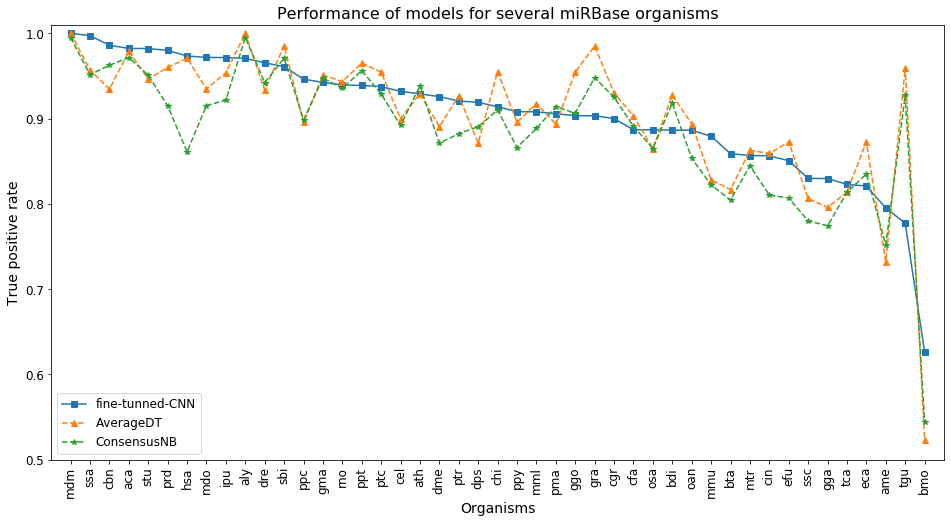

In [10]:
fig = plt.figure()
plt.figure(figsize=(16,8))

plt.plot(x_values, sorted_performance_df['fine-tuned-CNN'].tolist(), linestyle='-', marker='s', label="fine-tunned-CNN")
plt.plot(x_values, sorted_performance_df['AverageDT'].tolist(), linestyle='--', marker='^', label="AverageDT")
plt.plot(x_values, sorted_performance_df['ConsensusNB'].tolist(), linestyle='--', marker='*', label="ConsensusNB")

plt.legend(loc="lower left")

plt.xlabel('Organisms', fontsize=14)
plt.ylabel('True positive rate', fontsize=14)
plt.title('Performance of models for several miRBase organisms', fontsize=16)

plt.xticks(x_values, x_labels, rotation='vertical')
plt.axis([0, 46, 0.50, 1.01])
plt.savefig("species200_performance.png", bbox_inches = 'tight')
plt.show()

## Best model per organism

In [11]:
reduced_df = sorted_performance_df[['Acronym', 'fine-tuned-CNN', 'AverageDT', 'ConsensusNB']]

In [12]:
reduced_df.set_index('Acronym', inplace=True)
reduced_transposed = reduced_df.transpose()

In [13]:
reduced_transposed

Acronym,mdm,ssa,cbn,aca,stu,prd,hsa,mdo,ipu,aly,...,mtr,cin,efu,ssc,gga,tca,eca,ame,tgu,bmo
fine-tuned-CNN,1.0000,0.997305,0.985981,0.98227,0.982143,0.980,0.973418,0.971739,0.97153,0.970732,...,0.856716,0.856322,0.850598,0.829843,0.82973,0.822727,0.820979,0.795276,0.777328,0.626283
AverageDT,1.0000,0.956900,0.934600,0.97870,0.946400,0.960,0.970800,0.934800,0.95370,1.000000,...,0.862700,0.859200,0.872500,0.806300,0.79590,0.813600,0.872700,0.732300,0.959500,0.523600
ConsensusNB,0.9951,0.951500,0.962600,0.97160,0.950900,0.915,0.861200,0.915200,0.92170,0.995100,...,0.844800,0.810300,0.806800,0.780100,0.77430,0.813600,0.835000,0.752000,0.927100,0.544100


In [15]:
reduced_transposed["ath"]

fine-tuned-CNN    0.929012
AverageDT         0.929000
ConsensusNB       0.938300
Name: ath, dtype: float64

In [16]:
reduced_transposed["pma"]

fine-tuned-CNN    0.905738
AverageDT         0.893400
ConsensusNB       0.913900
Name: pma, dtype: float64

In [14]:
reduced_transposed.idxmax()

Acronym
mdm    fine-tuned-CNN
ssa    fine-tuned-CNN
cbn    fine-tuned-CNN
aca    fine-tuned-CNN
stu    fine-tuned-CNN
prd    fine-tuned-CNN
hsa    fine-tuned-CNN
mdo    fine-tuned-CNN
ipu    fine-tuned-CNN
aly         AverageDT
dre    fine-tuned-CNN
sbi         AverageDT
ppc    fine-tuned-CNN
gma         AverageDT
rno         AverageDT
ppt         AverageDT
ptc         AverageDT
cel    fine-tuned-CNN
ath       ConsensusNB
dme    fine-tuned-CNN
ptr         AverageDT
dps    fine-tuned-CNN
chi         AverageDT
ppy    fine-tuned-CNN
mml         AverageDT
pma       ConsensusNB
ggo         AverageDT
gra         AverageDT
cgr         AverageDT
cfa         AverageDT
osa    fine-tuned-CNN
bdi         AverageDT
oan         AverageDT
mmu    fine-tuned-CNN
bta    fine-tuned-CNN
mtr         AverageDT
cin         AverageDT
efu         AverageDT
ssc    fine-tuned-CNN
gga    fine-tuned-CNN
tca    fine-tuned-CNN
eca         AverageDT
ame    fine-tuned-CNN
tgu         AverageDT
bmo    fine-tuned-CNN
dt